# Data Augmentation

Data augmentation is a technique generally using in machine learning and computer vision to increase the diversity of data. In this technique, training data is used and manipulated with various methods such as transformation and modification.

The main goal of data augmentation is improving the model performance and generalization on the unseen data. It can be applied to various type of data like text, images and audio. In this notebook, we will work on image data and try to see power of data augmentation.

Common data augmentation techniques:
* Random rotation, flip, or translation image
* Rescaling image
* Croping image
* Changing the contrast, color, brightness etc.
* Adding noise

## Import libraries

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
# Import dataset from tensorflow datasets
(train_data, val_data, test_data), metadata = tfds.load(
    'beans',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incomplete2RP01U/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incomplete2RP01U/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incomplete2RP01U/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


## Inspect the data

In [3]:
# Check the metadata information
print('Class names:', metadata.features['label'].names)
print('Total class:', len(metadata.features['label'].names))

Class names: ['angular_leaf_spot', 'bean_rust', 'healthy']
Total class: 3


In [4]:
# Check the length of datasets
print('Total train data:', len(train_data))
print('Total validation data:', len(val_data))
print('Total test data:', len(test_data))

Total train data: 827
Total validation data: 104
Total test data: 103


In [5]:
# Check the shape of data
print('Train shape:', train_data.element_spec[0].shape)
print('Validataion shape:', val_data.element_spec[0].shape)
print('Test shape:', test_data.element_spec[0].shape)

Train shape: (500, 500, 3)
Validataion shape: (500, 500, 3)
Test shape: (500, 500, 3)


In [6]:
# Get a sample from train data
image, label = next(iter(train_data))
image

<tf.Tensor: shape=(500, 500, 3), dtype=uint8, numpy=
array([[[149, 132, 106],
        [141, 124,  98],
        [134, 118,  95],
        ...,
        [129, 152,  64],
        [129, 152,  64],
        [130, 153,  65]],

       [[151, 134, 108],
        [140, 124,  98],
        [133, 117,  94],
        ...,
        [126, 149,  61],
        [127, 150,  62],
        [127, 150,  62]],

       [[150, 134, 108],
        [140, 124,  98],
        [133, 117,  94],
        ...,
        [126, 151,  60],
        [125, 150,  59],
        [122, 147,  56]],

       ...,

       [[ 20,  33,  49],
        [ 21,  34,  50],
        [ 23,  36,  52],
        ...,
        [149, 211, 112],
        [145, 204, 120],
        [142, 200, 123]],

       [[ 21,  34,  50],
        [ 22,  35,  51],
        [ 23,  36,  52],
        ...,
        [151, 213, 114],
        [142, 201, 117],
        [136, 194, 118]],

       [[ 21,  34,  50],
        [ 21,  34,  50],
        [ 22,  35,  51],
        ...,
        [154, 216, 11

In [7]:
# Chek the maximum and minumum values of image pixels
print('Maximum values of image:', np.max(image))
print('Minumum values of image:', np.min(image))

Maximum values of image: 255
Minumum values of image: 0


In [8]:
# Get label name
get_label_name = metadata.features['label'].int2str

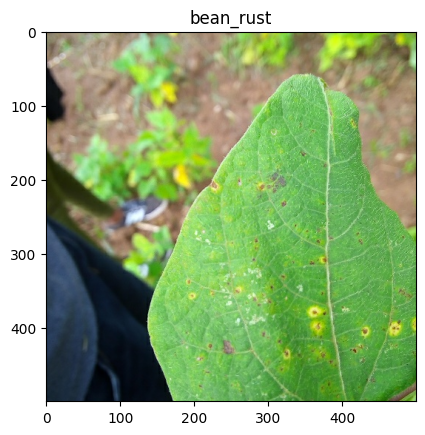

In [9]:
# Plot the image
plt.imshow(image)
plt.title(get_label_name(label))
plt.show()

## Resizing and rescaling image

Resizing and rescaling are most important steps before creating a model. Model prefers to get all image in same size, that's why we resize the all our images to same size. As you see above, we checked the maximum and minumum values of images and see that all values are between 0 and 255. However machine learning prefer the all values between 0 and 1 so we need to rescale the image values. Otherwise our model performs poor.

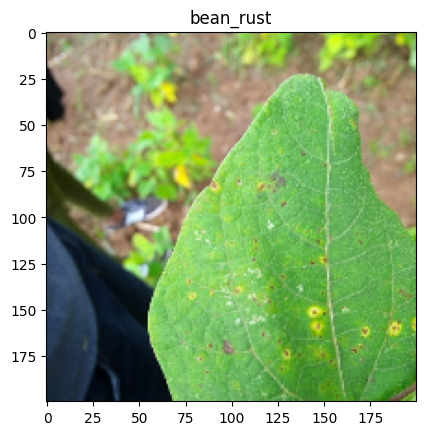

In [10]:
# Let's change the size and scale of our image and plot it how it looks like
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(200, 200),
    tf.keras.layers.Rescaling(1./255)
])

# Let's use the resize_and_rescale on our image and plot it
new_image = resize_and_rescale(image)
plt.imshow(new_image)
plt.title(get_label_name(label))
plt.show()

We resized the our image 500x500 to 200x200 but what about pixel values? Are they really changed? Let's check out.

In [11]:
# Chek the maximum and minumum values of scaled image
print('Maximum values of scaled image:', np.max(new_image))
print('Minumum values of scaled image:', np.min(new_image))

Maximum values of scaled image: 1.0
Minumum values of scaled image: 0.0


Yes that worked. All values are between 0 and 1.

## Data Augmentation

In this section, we will discover the data augmentation techniques and apply them onto our images and see how looks like images.

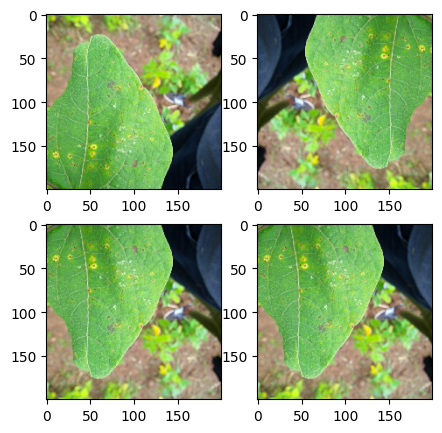

In [12]:
# Let's start with RandomFlip
data_augmentation_flip = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical') # we can select only horizontal and vertical
])

# Plot it 9 different option
plt.figure(figsize=(5, 5))
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(data_augmentation_flip(new_image))

Our images randomly fliped. Let's look another example but this time, I want to use two different transformation such as RandomFlip and RandomRotation. Let's see.

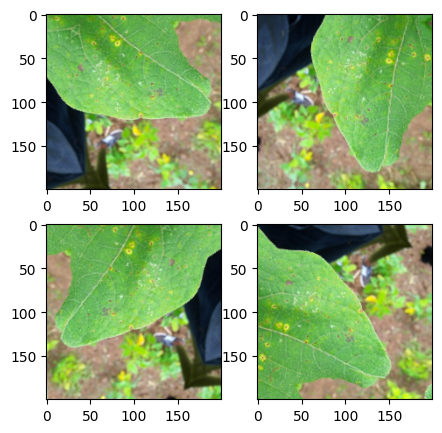

In [13]:
# Creating data augmentation object
data_augmentation_flip_rotatation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)
])

# Use it onto our images and plot
plt.figure(figsize=(5, 5))
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(data_augmentation_flip_rotatation(new_image))

This looks cool. We rotated and fliped our images same time and don't forget that output of this process is giving us **diversity** for better model performance. Now, I want to add more complex data augmentation techniques such as `RandomContrast`, `RandomCrop`, `RandomZoom`, etc.


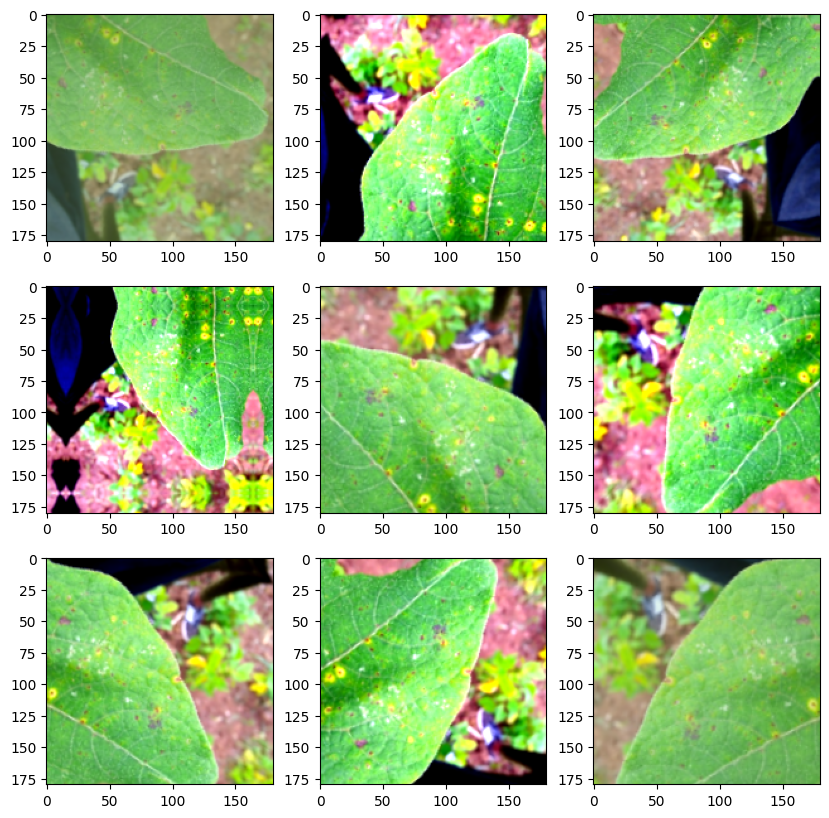

In [84]:
# Let's mix many data augmentation technique
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomContrast(factor=(0.5, 1.5)), # Change the contrast randomly between 0.5 and 1.5
    tf.keras.layers.RandomCrop(180, 180), # height and width 180x180
    tf.keras.layers.RandomZoom(0.3)
])

# Use it onto our images and plot
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  augmented_image = data_augmentation(new_image)
  plt.imshow(tf.clip_by_value(augmented_image, 0.0, 1.0))

That's look very cool. Actually, we created 9 different photo from only one using:

* RandomFlip
* RandomRotation
* RandomContrast
* RandomCrop
* RandomZoom

The point is that we mixed all of them and increased the **diversity**.